<a href="https://colab.research.google.com/github/AudreyMuller/Recommandation_Films_1980_s/blob/Maria/Copie_de_Matplolib_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

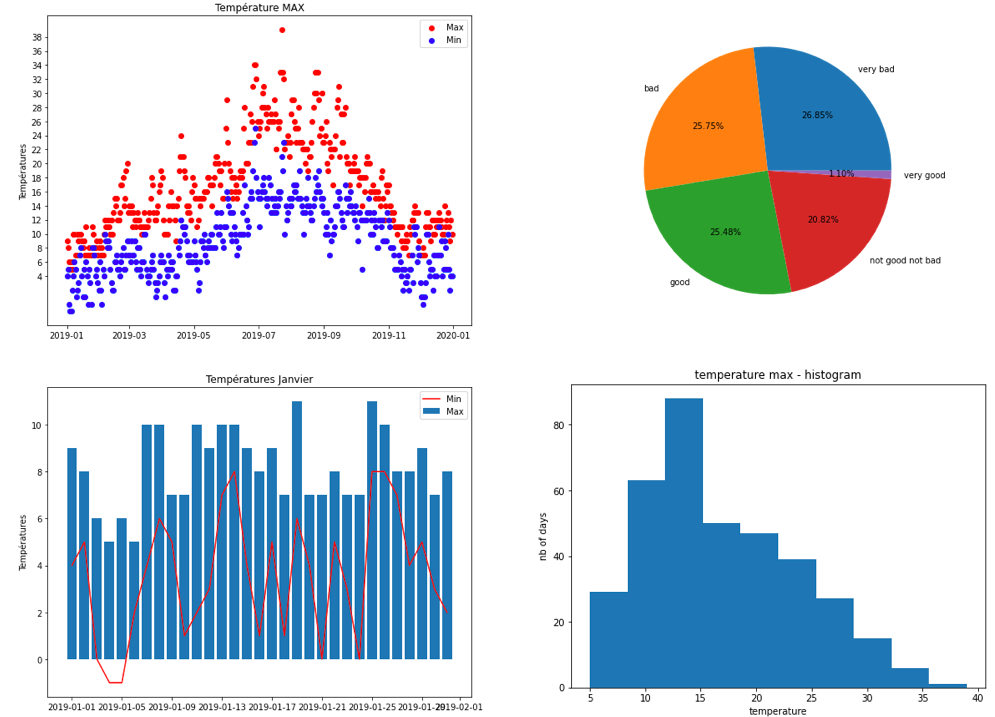

In [ ]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

In [ ]:
weather_category = df_weather['OPINION'].value_counts(normalize = True)
print(weather_category)
print(type(weather_category))

very bad            0.268493
bad                 0.257534
good                0.254795
not good not bad    0.208219
very good           0.010959
Name: OPINION, dtype: float64
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'max temperature')

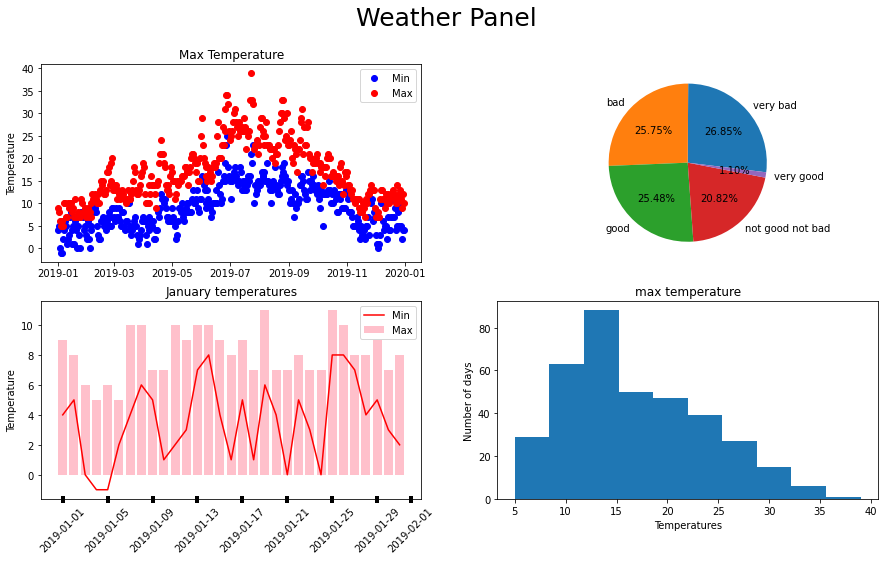

In [ ]:
# Display 4 graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Weather Panel", size=25)

# Graph No 1
ax1 = plt.subplot(221)
ax1.scatter(x=df_weather["DATE"], y=df_weather["MIN_TEMPERATURE_C"], c='blue', label='Min')
ax1.scatter(x=df_weather["DATE"], y=df_weather["MAX_TEMPERATURE_C"], c='red', label='Max')
ax1.set_ylabel("Temperature", size=10)
ax1.set_title("Max Temperature", size=12)
ax1.legend(loc=1)

# Graph No 2
weather_category = df_weather['OPINION'].value_counts(normalize=True)
ax2 = plt.subplot(222)
ax2.pie(weather_category, labels=weather_category.index, autopct='%1.2f%%', startangle=-7)

# Graph No3
df_january = df_weather[df_weather["DATE"].dt.month == 1]
ax3 = plt.subplot(223)
ax3.bar(x=df_january["DATE"], height=df_january["MAX_TEMPERATURE_C"], color='pink', label='Max')
ax3.plot(df_january["DATE"], df_january["MIN_TEMPERATURE_C"], color='red', label='Min')
ax3.tick_params(axis='x', direction='inout', length=7, width=4, labelrotation=45)
ax3.set_ylabel("Temperature", size=10)
ax3.set_title("January temperatures", size=12)
ax3.legend(loc=1)


# Graph No 4
ax4 = plt.subplot(224)
ax4.hist(df_weather["MAX_TEMPERATURE_C"], bins=10)
ax4.set_xlabel("Temperatures", size=10)
ax4.set_ylabel("Number of days", size=10)
ax4.set_title("max temperature", size=12)

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

Text(0.5, 1.0, 'Min temperature')

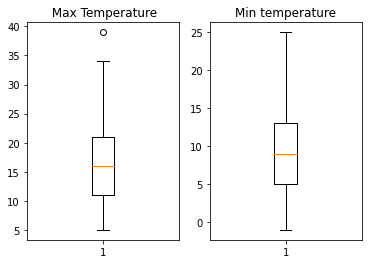

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(df_weather['MAX_TEMPERATURE_C'])
plt.title(" Max Temperature")
plt.subplot(1,2,2)
plt.boxplot(df_weather['MIN_TEMPERATURE_C']);
plt.title("Min temperature")
#Yes there are outliers in the max temperature which is 39

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

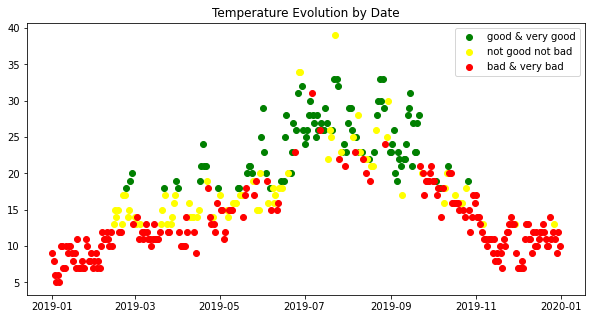

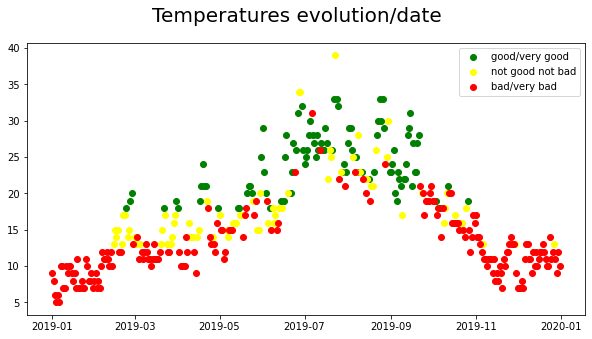

In [ ]:
# It's your turn now :
df_good = df_weather[(df_weather["OPINION"] == "good") | (df_weather["OPINION"] == "very good")] \
                    [["DATE", "MAX_TEMPERATURE_C"]]

df_bad = df_weather[df_weather["OPINION"].isin(["bad", "very bad"])][["DATE", "MAX_TEMPERATURE_C"]]

df_not = df_weather.loc[df_weather["OPINION"] == "not good not bad", ["DATE", "MAX_TEMPERATURE_C"]]


plt.subplots(figsize=(10, 5))
plt.suptitle("Temperatures evolution/date", size=20)
plt.scatter(x=df_good["DATE"], y=df_good["MAX_TEMPERATURE_C"], c='green')
plt.scatter(x=df_not["DATE"], y=df_not["MAX_TEMPERATURE_C"], c='yellow')
plt.scatter(x=df_bad["DATE"], y=df_bad["MAX_TEMPERATURE_C"], c='red')
plt.legend(["good/very good", "not good not bad", "bad/very bad"],
           loc=1)
plt.show()
